In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import os
from cartopy.mpl.gridliner import (LONGITUDE_FORMATTER,
                                   LATITUDE_FORMATTER)
%matplotlib inline

fig_basedir = '/home/bolster/src/thesis/Figures/'

LAND = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='face',
                                    facecolor=cfeature.COLORS['land'])


def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw=dict(projection=projection))
    ax.set_extent(bbox)
    ax.add_feature(LAND, facecolor='0.75')
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax


In [4]:

import matplotlib.pyplot as plt
from oceans.colormaps import cm
from oceans.ff_tools import wrap_lon180

from oceans.datasets import woa_subset



print(cubes)

NameError: name 'cubes' is not defined

In [5]:

import matplotlib.pyplot as plt
import iris.plot as iplt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from palettable import colorbrewer



def make_map(cube, projection=ccrs.PlateCarree(), figsize=(12, 10),
             cmap=cm.avhrr, label='temperature'):
    fig, ax = plt.subplots(figsize=figsize,
                           subplot_kw=dict(projection=projection))
    ax.add_feature(cfeature.LAND, facecolor='0.75')
    cs = iplt.pcolormesh(cube, cmap=cmap)
    ax.coastlines()
    if isinstance(projection, ccrs.PlateCarree) or isinstance(projection, ccrs.Mercator):
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1.5,
                          color='gray', alpha=0.5, linestyle='--')
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    cbar = dict(extend='both', shrink=0.5, pad=0.02,
                orientation='horizontal', fraction=0.1)
    cb = fig.colorbar(cs, **cbar)
    if label == 'temperature':
        cb.ax.set_xlabel(r"$^{\circ}$ C")
    elif label == 'salinity':
        cb.ax.set_xlabel(r"Salinity $(ppt)$")

    else:
        cb.ax.set_xlabel(label)
    return fig, ax

In [17]:
help(woa_subset)

Help on function woa_subset in module oceans.datasets.datasets:

woa_subset(bbox=[2.5, 357.5, -87.5, 87.5], variable='temperature', clim_type='00', resolution='1.00', full=False)
    Return an iris.cube instance from a World Ocean Atlas 2013 variable at a
    given lon, lat bounding box.
    
    Parameters
    ----------
    bbox: list, tuple
          minx, maxx, miny, maxy positions to extract.
    Choose data `variable` from:
        `dissolved_oxygen`, `salinity`, `temperature`, `oxygen_saturation`,
        `apparent_oxygen_utilization`, `phosphate`, `silicate`, or `nitrate`.
    Choose `clim_type` averages from:
        01-12 :: monthly
        13-16 :: seasonal (North Hemisphere Winter, Spring, Summer,
                           and Autumn respectively)
        00 :: annual
    Choose `resolution` from:
        1 (1 degree), or 4 (0.25 degrees)
    
    Returns
    -------
    Iris.cube instance with the climatology.
    
    Examples
    --------
    >>> import iris
    >>> imp

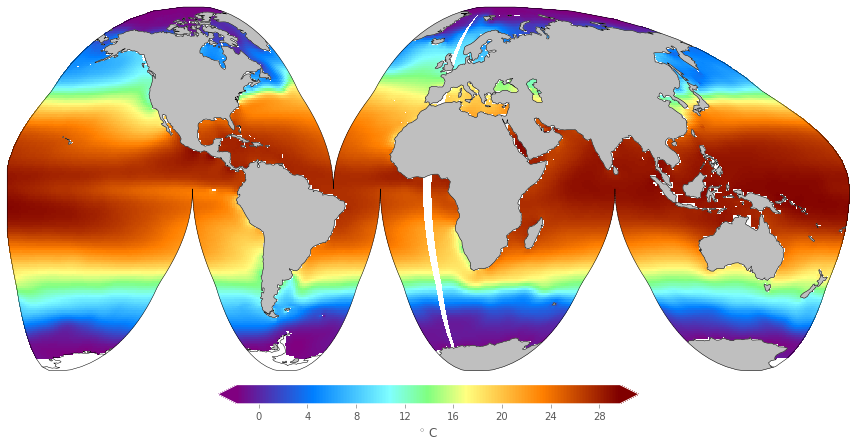

In [27]:
bbox = [2.5, 357.5, -87.5, 87.5]
kw = dict(bbox=bbox, variable='temperature', clim_type='00',
          resolution='1.00', full=True)

cubes = woa_subset(**kw)
cube = cubes[4]
c = cube[0, 0, ...]
fig, ax = make_map(c, projection=ccrs.InterruptedGoodeHomolosine())
fig.tight_layout()
fig.savefig(os.path.join(fig_basedir,'temp_globe_test.pdf'), bbox_inches='tight')

In [28]:
cube.shape

(1, 102, 176, 356)

In [22]:
cube.shape

(1, 102, 702, 1422)

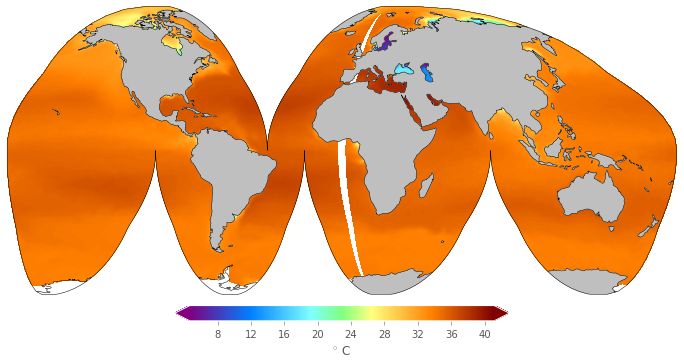

In [15]:
cube = cubes[5]
c = cube[0, 0, ...]
fig, ax = make_map(c, projection=ccrs.InterruptedGoodeHomolosine())
#fig.savefig(os.path.join(fig_basedir,'temp_globe.pdf'))

In [6]:
from oceans import woa_profile

kw = dict(variable='salinity', clim_type='00', resolution='1.00', full=False)
polar = woa_profile(-25.5, -70.5, **kw)
tempe = woa_profile(-25.5, -50.0, **kw)
equat = woa_profile(-25.5, 0, **kw)
print(polar)

/home/bolster/anaconda2/envs/py2/lib/python2.7/site-packages/iris/fileformats/cf.py:1139: UserWarning: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warnings.warn(msg)
/home/bolster/anaconda2/envs/py2/lib/python2.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1627: UserWarning: NetCDF variable 's_sd' contains unknown cell method 'standard'
  '{}'.format(method_words[0])))


Objectively analyzed mean fields for salinity at standard depth levels. / (1) (time: 1; depth: 102)
     Dimension coordinates:
          time                                                                     x         -
          depth                                                                    -         x
     Scalar coordinates:
          latitude: -70.5 degrees, bound=(-71.0, -70.0) degrees
          longitude: -25.5 degrees, bound=(-26.0, -25.0) degrees
     Attributes:
          Conventions: CF-1.6
          Metadata_Conventions: Unidata Dataset Discovery v1.0
          cdm_data_type: Grid
          comment: global climatology as part of the World Ocean Atlas project
          contributor_name: Ocean Climate Laboratory
          contributor_role: Calculation of climatologies
          creator_email: NODC.Services@noaa.gov
          creator_name: Ocean Climate Laboratory
          creator_url: http://www.nodc.noaa.gov
          date_created: 2011-09-28 
          date_mod

/home/bolster/anaconda2/envs/py2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


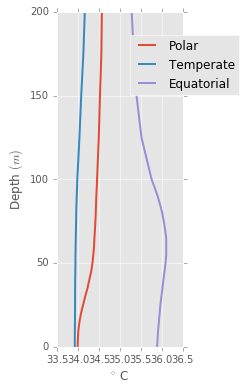

In [7]:

from matplotlib import style
import matplotlib.pyplot as plt


style.use('ggplot')

def plot_profile(cube, label):
    z = cube.coord(axis='Z').points
    l = ax.plot(cube[0, :].data, z, label=label, linewidth=2)

fig, ax = plt.subplots(figsize=(2.25, 6))
plot_profile(polar, label='Polar')
plot_profile(tempe, label='Temperate')
plot_profile(equat, label='Equatorial')
ax.legend(bbox_to_anchor=(1.5, .95))
ax.invert_yaxis()
ax.set_xlabel(r"$^{\circ}$ C")
ax.set_ylabel(r"Depth $(m)$")
_ = ax.set_ylim(0, 200)
fig.show()
#fig.savefig(os.path.join(fig_basedir,'temp_profiles.pdf'))

In [8]:
plt.show()

In [38]:
fig, ax, cbar = plot_section(dataset, cmap=cm.avhrr, marker=None,
                             levels=levels, figsize=(10, 4))
X = ax.get_xticks()
offset = 1.01
ax.set_xlim(X.min() * offset, X.max() * offset)
new_labels = np.linspace(dataset.lat.min(), dataset.lat.max(), len(X))
new_labels = [u'%i\u00B0' % num for num in new_labels]
ax.set_xticklabels(new_labels)
ax.set_xlabel(u'WOA09 Salinity Section at Longitude %3.1f\u00B0' % longitude)
ax.set_ylabel('Depth [m]')

axin = inset_axes(ax, width="40%", height="40%", loc=4)
inmap = Basemap(projection='ortho', lon_0=longitude, lat_0=0,
                ax=axin, anchor='NE')
inmap.bluemarble()
_ = inmap.plot(dataset.lon, dataset.lat, 'r', latlon=True)

array([-25.5], dtype=float32)

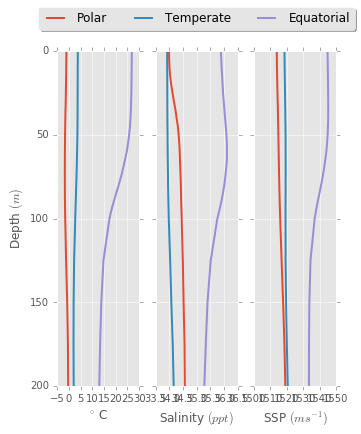

In [32]:

from matplotlib import style
import matplotlib.pyplot as plt
%matplotlib inline

def _cube_decomposer(cube):
    return cube[0,:].data, cube.coord(axis='Z').points

def plot_profile(ax,cube, label):
    x,z = _cube_decomposer(cube)
    l = ax.plot(x, z, label=label, linewidth=2)

def ssp_decuber(S,T):
    s,zs=_cube_decomposer(S)
    t,zt=_cube_decomposer(T)
    return ssp(s,t,zs)
    
def ssp(t,s,d):
    v=1448.96+\
      4.591*t-\
      (5.304*10**-2)*(np.power(t,2))+\
      (2.374*10**-4)*(np.power(t,3))+\
      (1.34*(s-35))+\
      (1.63*10**-2)*d+\
      (1.675*10**-7)*(np.power(d,2))-\
      (1.025*10**-2)*(t*(s-25))-\
      (7.139*10**-13)*(t*np.power(d,3))
    return v

fig, (axT, axS, axV) = plt.subplots(1,3,sharey=True,figsize=(5, 6))
kw = dict(variable='temperature', clim_type='00', resolution='1.00', full=False)
polar_t = woa_profile(-25.5, -70.5, **kw)
tempe_t = woa_profile(-25.5, -50.0, **kw)
equat_t = woa_profile(-25.5, 0, **kw)
plot_profile(axT,polar_t, label='Polar')
plot_profile(axT,tempe_t, label='Temperate')
plot_profile(axT,equat_t, label='Equatorial')
axT.invert_yaxis()
axT.set_xlabel(r"$^{\circ}$ C")
axT.set_ylabel(r"Depth $(m)$")
_ = axT.set_ylim(200,0)


kw = dict(variable='salinity', clim_type='00', resolution='1.00', full=False)
polar_s = woa_profile(-25.5, -70.5, **kw)
tempe_s = woa_profile(-25.5, -50.0, **kw)
equat_s = woa_profile(-25.5, 0, **kw)
plot_profile(axS,polar_s, label='Polar')
plot_profile(axS,tempe_s, label='Temperate')
plot_profile(axS,equat_s, label='Equatorial')
axS.invert_yaxis()

axS.set_xlabel(r"Salinity $(ppt)$")
_ = axS.set_ylim(200,0)

_,z=_cube_decomposer(polar_s)
polar_v = ssp_decuber(polar_s, polar_t)
tempe_v = ssp_decuber(tempe_s, tempe_t)
equat_v = ssp_decuber(equat_s, equat_t)
axV.plot(polar_v, z, label='Polar',linewidth=2)
axV.plot(tempe_v, z, label='Temperate',linewidth=2)
axV.plot(equat_v, z, label='Equatorial',linewidth=2)
axV.invert_yaxis()
axV.set_xlabel(r"SSP $(ms^{-1})$")
_ = axV.set_ylim(200,0)
_ = axV.set_xlim(1500,1550)
axS.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=True)

In [25]:
max(map(max, [polar_v,tempe_v, equat_v]))

1590.3092

In [26]:
min(map(min, [polar_v,tempe_v, equat_v]))

1513.8424